# Basics of Neural Networks

In [2]:
from lib.fully_conn import *
from lib.layer_utils import *
from lib.grad_check import *
from lib.datasets import *
from lib.optim import *
from lib.train import *
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data (CIFAR-10)

In [4]:
# !./get_datasets.sh
data = CIFAR10_data()
for k, v in data.items():
    print ("Name: {} Shape: {}".format(k, v.shape))

Name: data_train Shape: (49000, 3, 32, 32)
Name: labels_train Shape: (49000,)
Name: data_val Shape: (1000, 3, 32, 32)
Name: labels_val Shape: (1000,)
Name: data_test Shape: (1000, 3, 32, 32)
Name: labels_test Shape: (1000,)


## Implement Standard Layers

## FC Forward

In [5]:
%reload_ext autoreload

# Test the fc forward function
input_bz = 3
input_dim = (7, 6, 4)
output_dim = 4

input_size = input_bz * np.prod(input_dim)
weight_size = output_dim * np.prod(input_dim)

flatten_layer = flatten(name="flatten_test")
single_fc = fc(np.prod(input_dim), output_dim, init_scale=0.02, name="fc_test")

x = np.linspace(-0.1, 0.4, num=input_size).reshape(input_bz, *input_dim)
w = np.linspace(-0.2, 0.2, num=weight_size).reshape(np.prod(input_dim), output_dim)
b = np.linspace(-0.3, 0.3, num=output_dim)

single_fc.params[single_fc.w_name] = w
single_fc.params[single_fc.b_name] = b

out = single_fc.forward(flatten_layer.forward(x))

correct_out = np.array([[0.63910291, 0.83740057, 1.03569824, 1.23399591],
                        [0.61401587, 0.82903823, 1.04406058, 1.25908294],
                        [0.58892884, 0.82067589, 1.05242293, 1.28416997]])

# Compare your output with the above pre-computed ones. 
# The difference should not be larger than 1e-8
print ("Difference: ", rel_error(out, correct_out))

Difference:  4.02601629459e-09


## FC Backward

In [6]:
%reload_ext autoreload

# Test the fc backward function
x = np.random.randn(15, 2, 2, 3)
w = np.random.randn(12, 15)
b = np.random.randn(15)
dout = np.random.randn(15, 15)

flatten_layer = flatten(name="flatten_test")
x = flatten_layer.forward(x)
single_fc = fc(np.prod(x.shape[1:]), 15, init_scale=5e-2, name="fc_test")
single_fc.params[single_fc.w_name] = w
single_fc.params[single_fc.b_name] = b

dx_num = eval_numerical_gradient_array(lambda x: single_fc.forward(x), x, dout)
dw_num = eval_numerical_gradient_array(lambda w: single_fc.forward(x), w, dout)
db_num = eval_numerical_gradient_array(lambda b: single_fc.forward(x), b, dout)

out = single_fc.forward(x)
dx = single_fc.backward(dout)
dw = single_fc.grads[single_fc.w_name]
db = single_fc.grads[single_fc.b_name]
# The error should be around 1e-9
print ("dx Error: ", rel_error(dx_num, dx))
# The errors should be around 1e-10
print ("dw Error: ", rel_error(dw_num, dw))
print ("db Error: ", rel_error(db_num, db))

dx Error:  4.43677168445e-09
dw Error:  1.11810237603e-09
db Error:  4.41019971417e-11


## ReLU Forward

In [3]:
%reload_ext autoreload

# Test the relu forward function
x = np.linspace(-1.5, 1.5, num=12).reshape(3, 4)
relu_f = relu(name="relu_f")

out = relu_f.forward(x)

correct_out = np.array([[0.,          0.,         0.,         0.        ],
                        [0.,          0.,         0.13636364, 0.40909091],
                        [0.68181818,  0.95454545, 1.22727273, 1.5      ]])

# Compare your output with the above pre-computed ones. 
# The difference should not be larger than 1e-7
print ("Difference: ", rel_error(out, correct_out))

Difference:  1.33333336296e-08


## ReLU Backward

In [8]:
%reload_ext autoreload

# Test the relu backward function
x = np.random.randn(15, 15)
dout = np.random.randn(*x.shape)
relu_b = relu(name="relu_b")

dx_num = eval_numerical_gradient_array(lambda x: relu_b.forward(x), x, dout)

out = relu_b.forward(x)
dx = relu_b.backward(dout)

# The error should not be larger than 1e-10
print ("dx Error: ", rel_error(dx_num, dx))

dx Error:  3.27561527558e-12


## Dropout Forward

In [9]:
%reload_ext autoreload

x = np.random.randn(100, 100) + 5.0

print ("----------------------------------------------------------------")
for p in [0, 0.25, 0.50, 0.75, 1]:
    dropout_f = dropout(keep_prob=p)
    out = dropout_f.forward(x, True)
    out_test = dropout_f.forward(x, False)

    print ("Dropout Keep Prob = ", p)
    print ("Mean of input: ", x.mean())
    print ("Mean of output during training time: ", out.mean())
    print ("Mean of output during testing time: ", out_test.mean())
    print ("Fraction of output set to zero during training time: ", (out == 0).mean())
    print ("Fraction of output set to zero during testing time: ", (out_test == 0).mean())
    print ("----------------------------------------------------------------")

----------------------------------------------------------------
Dropout Keep Prob =  0
Mean of input:  4.99602817585
Mean of output during training time:  4.99602817585
Mean of output during testing time:  4.99602817585
Fraction of output set to zero during training time:  0.0
Fraction of output set to zero during testing time:  0.0
----------------------------------------------------------------
Dropout Keep Prob =  0.25
Mean of input:  4.99602817585
Mean of output during training time:  5.00661249794
Mean of output during testing time:  4.99602817585
Fraction of output set to zero during training time:  0.7499
Fraction of output set to zero during testing time:  0.0
----------------------------------------------------------------
Dropout Keep Prob =  0.5
Mean of input:  4.99602817585
Mean of output during training time:  4.94895309258
Mean of output during testing time:  4.99602817585
Fraction of output set to zero during training time:  0.5045
Fraction of output set to zero during 

## Dropout Backward

In [4]:
%reload_ext autoreload

x = np.random.randn(5, 5) + 5
dout = np.random.randn(*x.shape)

keep_prob = 0.75
dropout_b = dropout(keep_prob, seed=100)
out = dropout_b.forward(x, True)
dx = dropout_b.backward(dout)
dx_num = eval_numerical_gradient_array(lambda xx: dropout_b.forward(xx, True), x, dout)

# The error should not be larger than 1e-9
print ('dx relative error: ', rel_error(dx, dx_num))

dx relative error:  3.0031159197e-11


## Testing cascaded layers: FC + ReLU
Designing an `FC --> ReLU` two-layer-mini-network where the parameters of them match the given x, w, and b <br />
The `_w`, and `_b` are automatically assigned during network setup 

In [14]:
%reload_ext autoreload

x = np.random.randn(3, 4, 5)  # the input features
w = np.random.randn(20, 10)   # the weight of fc layer
b = np.random.randn(10)       # the bias of fc layer
dout = np.random.randn(3, 10) # the gradients to the output, notice the shape

tiny_net = TestFCReLU()

# param_name should be replaced accordingly
tiny_net.net.assign("fc_w", w)
tiny_net.net.assign("fc_b", b)

out = tiny_net.forward(x)
dx = tiny_net.backward(dout)

# param_name should be replaced accordingly
dw = tiny_net.net.get_grads("fc_w")
db = tiny_net.net.get_grads("fc_b")

dx_num = eval_numerical_gradient_array(lambda x: tiny_net.forward(x), x, dout)
dx_num = np.transpose(dx_num,[0,1,2]).reshape(3,20)
dw_num = eval_numerical_gradient_array(lambda w: tiny_net.forward(x), w, dout)
db_num = eval_numerical_gradient_array(lambda b: tiny_net.forward(x), b, dout)
# The errors should not be larger than 1e-7
print ("dx error: ", rel_error(dx_num, dx))
print ("dw error: ", rel_error(dw_num, dw))
print ("db error: ", rel_error(db_num, db))

dx error:  4.49834393008e-08
dw error:  1.29710390635e-09
db error:  2.54800071914e-11


## SoftMax Function and Loss Layer
Implementing `cross_entropy` using `softmax`.

In [12]:
%reload_ext autoreload

num_classes, num_inputs = 6, 100
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

test_loss = cross_entropy()

dx_num = eval_numerical_gradient(lambda x: test_loss.forward(x, y), x, verbose=False)

loss = test_loss.forward(x, y)
dx = test_loss.backward()

# Test softmax_loss function. Loss should be around 1.792
# and dx error should be at the scale of 1e-8 (or smaller)
print ("Cross Entropy Loss: ", loss)
print ("dx error: ", rel_error(dx_num, dx))

Cross Entropy Loss:  1.79173177324
dx error:  8.16249939595e-09


## Test a Small Fully Connected Network
Designing an `FC --> ReLU --> FC --> ReLU` network where the shapes of parameters match the given shapes <br />
Here you only modify the param_name part, the `_w`, and `_b` are automatically assigned during network setup 

In [13]:
%reload_ext autoreload

seed = 1234
np.random.seed(seed=seed)

model = SmallFullyConnectedNetwork()
loss_func = cross_entropy()

N, D, = 4, 4  # N: batch size, D: input dimension
H, C  = 30, 7 # H: hidden dimension, C: output dimension
std = 0.02
x = np.random.randn(N, D)
y = np.random.randint(C, size=N)

print ("Testing initialization ... ")

# param_name should be replaced accordingly
w1_std = abs(model.net.get_params("t2_fc1_w").std() - std)
b1 = model.net.get_params("t2_fc1_b").std()
w2_std = abs(model.net.get_params("t2_fc2_w").std() - std)
b2 = model.net.get_params("t2_fc2_b").std()

assert w1_std < std / 10, "First layer weights do not seem right"
assert np.all(b1 == 0), "First layer biases do not seem right"
assert w2_std < std / 10, "Second layer weights do not seem right"
assert np.all(b2 == 0), "Second layer biases do not seem right"
print ("Passed!")

print ("Testing test-time forward pass ... ")
w1 = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
w2 = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
b1 = np.linspace(-0.1, 0.9, num=H)
b2 = np.linspace(-0.9, 0.1, num=C)

# param_name should be replaced accordingly
model.net.assign("t2_fc1_w", w1)
model.net.assign("t2_fc1_b", b1)
model.net.assign("t2_fc2_w", w2)
model.net.assign("t2_fc2_b", b2)

feats = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
scores = model.forward(feats)
correct_scores = np.asarray([[4.20670862, 4.87188359, 5.53705856, 6.20223352, 6.86740849, 7.53258346, 8.19775843],
                             [4.74826036, 5.35984681, 5.97143326, 6.58301972, 7.19460617, 7.80619262, 8.41777907],
                             [5.2898121,  5.84781003, 6.40580797, 6.96380591, 7.52180384, 8.07980178, 8.63779971],
                             [5.83136384, 6.33577326, 6.84018268, 7.3445921,  7.84900151, 8.35341093, 8.85782035]])
scores_diff = np.sum(np.abs(scores - correct_scores))
assert scores_diff < 1e-6, "Your implementation might went wrong!"
print ("Passed!")

print ("Testing the loss ...",)
y = np.asarray([0, 5, 1, 4])
loss = loss_func.forward(scores, y)
dLoss = loss_func.backward()
correct_loss = 2.90181552716
assert abs(loss - correct_loss) < 1e-10, "Your implementation might went wrong!"
print ("Passed!")

print ("Testing the gradients (error should be no larger than 1e-6) ...")

din = model.backward(dLoss)
for layer in model.net.layers:
    if not layer.params:
        continue
    for name in sorted(layer.grads):
        f = lambda _: loss_func.forward(model.forward(feats), y)
        grad_num = eval_numerical_gradient(f, layer.params[name], verbose=False)
        print ('%s relative error: %.2e' % (name, rel_error(grad_num, layer.grads[name])))

Testing initialization ... 
Passed!
Testing test-time forward pass ... 
Passed!
Testing the loss ...
Passed!
Testing the gradients (error should be no larger than 1e-6) ...
t2_fc1_b relative error: 2.85e-09
t2_fc1_w relative error: 5.01e-09
t2_fc2_b relative error: 4.33e-07
t2_fc2_w relative error: 3.03e-09


## Test a Fully Connected Network regularized with Dropout

In [14]:
%reload_ext autoreload

seed = 1234
np.random.seed(seed=seed)

N, D, C = 3, 15, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

for keep_prob in [0, 0.25, 0.5]:
    print ("Dropout p =", keep_prob)
    model = DropoutNet(keep_prob=keep_prob, seed=seed)
    loss_func = cross_entropy()
    output = model.forward(X, True)
    loss = loss_func.forward(output, y)
    dLoss = loss_func.backward()
    dX = model.backward(dLoss)
    grads = model.net.grads

    print ("Error of gradients should be around or less than 1e-5")
    for name in sorted(grads):
        if name not in model.net.params.keys():
            continue
        f = lambda _: loss_func.forward(model.forward(X, True), y)
        grad_num = eval_numerical_gradient(f, model.net.params[name], verbose=False, h=1e-5)
        print ("{} relative error: {}".format(name, rel_error(grad_num, grads[name])))
    print ()

Dropout p = 0
Error of gradients should be around or less than 1e-5
fc1_b relative error: 5.840564695395856e-08
fc1_w relative error: 2.3619787033387504e-06
fc2_b relative error: 4.5571668583268356e-08
fc2_w relative error: 7.639166167619062e-06
fc3_b relative error: 2.1827243320409778e-10
fc3_w relative error: 1.1814111607617203e-06

Dropout p = 0.25
Error of gradients should be around or less than 1e-5
fc1_b relative error: 1.992102084590713e-08
fc1_w relative error: 1.5180637259251784e-06
fc2_b relative error: 7.688416889146262e-08
fc2_w relative error: 3.325050324438322e-06
fc3_b relative error: 1.609799375618303e-10
fc3_w relative error: 2.5126126837209784e-08

Dropout p = 0.5
Error of gradients should be around or less than 1e-5
fc1_b relative error: 9.151700595760797e-08
fc1_w relative error: 6.741961685086437e-06
fc2_b relative error: 3.239612864010181e-08
fc2_w relative error: 1.2538976911428768e-05
fc3_b relative error: 1.6811915853154102e-10
fc3_w relative error: 1.384745777

## Training a Network
In this section, we defined a `TinyNet` class.

In [15]:
# Arrange the data
data_dict = {
    "data_train": (data["data_train"], data["labels_train"]),
    "data_val": (data["data_val"], data["labels_val"]),
    "data_test": (data["data_test"], data["labels_test"])
}

In [16]:
print(data["data_train"].shape)
print(data["labels_train"].shape)

(49000, 3, 32, 32)
(49000,)


### Now train the network to achieve at least 50% validation accuracy

In [17]:
%reload_ext autoreload

seed = 123
np.random.seed(seed=seed)

model = TinyNet()
loss_f = cross_entropy()
optimizer = SGD(model.net, 5e-4)

results = None
#############################################################################
# TODO: Use the train_net function you completed to train a network         #
#############################################################################
results = train_net(data_dict, model, loss_f, optimizer, batch_size=100, 
                        max_epochs=50, show_every=1500,verbose=True)
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################
opt_params, loss_hist, train_acc_hist, val_acc_hist = results

(Iteration 1 / 24500) loss: 58.946195930205405
(Epoch 1 / 50) Training Accuracy: 0.4034081632653061, Validation Accuracy: 0.394
(Epoch 2 / 50) Training Accuracy: 0.29920408163265305, Validation Accuracy: 0.278
(Epoch 3 / 50) Training Accuracy: 0.45818367346938776, Validation Accuracy: 0.4
(Iteration 1501 / 24500) loss: 10.094360152084342
(Epoch 4 / 50) Training Accuracy: 0.44948979591836735, Validation Accuracy: 0.414
(Epoch 5 / 50) Training Accuracy: 0.5385714285714286, Validation Accuracy: 0.454
(Epoch 6 / 50) Training Accuracy: 0.5162040816326531, Validation Accuracy: 0.399
(Iteration 3001 / 24500) loss: 12.311785464041627
(Epoch 7 / 50) Training Accuracy: 0.49926530612244896, Validation Accuracy: 0.383
(Epoch 8 / 50) Training Accuracy: 0.4729591836734694, Validation Accuracy: 0.351
(Epoch 9 / 50) Training Accuracy: 0.5913265306122449, Validation Accuracy: 0.452
(Iteration 4501 / 24500) loss: 12.423429708028307
(Epoch 10 / 50) Training Accuracy: 0.5196326530612245, Validation Accura

In [18]:
# Take a look at what names of params were stored
print (opt_params.keys())

dict_keys(['fc1_w', 'fc1_b', 'fc2_w', 'fc2_b'])


In [19]:
# Demo: How to load the parameters to a newly defined network
model = TinyNet()
model.net.load(opt_params)
val_acc = compute_acc(model, data["data_val"], data["labels_val"])
print ("Validation Accuracy: {}%".format(val_acc*100))
test_acc = compute_acc(model, data["data_test"], data["labels_test"])
print ("Testing Accuracy: {}%".format(test_acc*100))

Loading Params: fc1_w Shape: (3072, 1800)
Loading Params: fc1_b Shape: (1800,)
Loading Params: fc2_w Shape: (1800, 10)
Loading Params: fc2_b Shape: (10,)
Validation Accuracy: 52.300000000000004%
Testing Accuracy: 51.9%


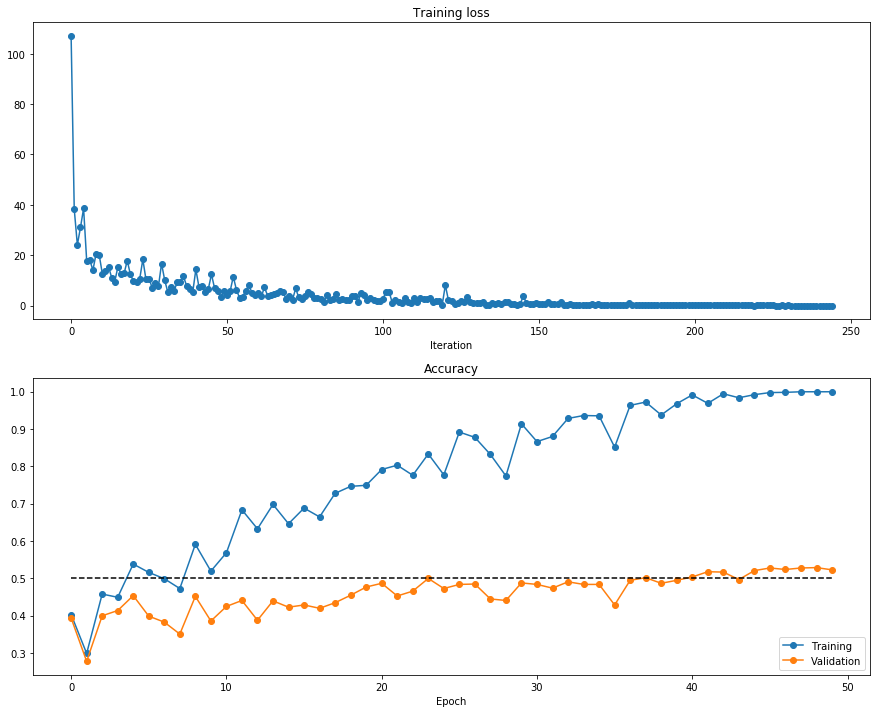

In [20]:
# Plot the learning curves
plt.subplot(2, 1, 1)
plt.title('Training loss')
loss_hist_ = loss_hist[1::100] # sparse the curve a bit
plt.plot(loss_hist_, '-o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(train_acc_hist, '-o', label='Training')
plt.plot(val_acc_hist, '-o', label='Validation')
plt.plot([0.5] * len(val_acc_hist), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

## Different Optimizers

## SGD + Momentum
SGD plus momentum:  
\begin{equation}
v_t: last\ update\ of\ the\ velocity \\
\gamma: momentum \\
\eta: learning\ rate \\
v_t = \gamma v_{t-1} - \eta \nabla_{\theta}J(\theta) \\
\theta = \theta + v_t
\end{equation}

In [21]:
# Test the implementation of SGD with Momentum
N, D = 4, 5
test_sgd = sequential(fc(N, D, name="sgd_fc"))

w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

test_sgd.layers[0].params = {"sgd_fc_w": w}
test_sgd.layers[0].grads = {"sgd_fc_w": dw}

test_sgd_momentum = SGDM(test_sgd, 1e-3, 0.9)
test_sgd_momentum.velocity = {"sgd_fc_w": v}
test_sgd_momentum.step()

updated_w = test_sgd.layers[0].params["sgd_fc_w"]
velocity = test_sgd_momentum.velocity["sgd_fc_w"]

expected_updated_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

print ('The following errors should be around or less than 1e-8')
print ('updated_w error: ', rel_error(updated_w, expected_updated_w))
print ('velocity error: ', rel_error(expected_velocity, velocity))

The following errors should be around or less than 1e-8
updated_w error:  8.88234703351e-09
velocity error:  4.26928774328e-09


Training with Vanilla SGD...
(Iteration 1 / 200) loss: 2.4231344299657205
(Epoch 1 / 5) Training Accuracy: 0.29525, Validation Accuracy: 0.255
(Epoch 2 / 5) Training Accuracy: 0.347, Validation Accuracy: 0.303
(Iteration 101 / 200) loss: 1.7472184146227066
(Epoch 3 / 5) Training Accuracy: 0.3545, Validation Accuracy: 0.301
(Epoch 4 / 5) Training Accuracy: 0.385, Validation Accuracy: 0.34
(Epoch 5 / 5) Training Accuracy: 0.4385, Validation Accuracy: 0.347

Training with SGD plus Momentum...
(Iteration 1 / 200) loss: 2.6909163411588746
(Epoch 1 / 5) Training Accuracy: 0.308, Validation Accuracy: 0.287
(Epoch 2 / 5) Training Accuracy: 0.37125, Validation Accuracy: 0.332
(Iteration 101 / 200) loss: 1.5618315501493405
(Epoch 3 / 5) Training Accuracy: 0.43925, Validation Accuracy: 0.343
(Epoch 4 / 5) Training Accuracy: 0.48, Validation Accuracy: 0.352
(Epoch 5 / 5) Training Accuracy: 0.54025, Validation Accuracy: 0.362


/anaconda3/envs/yulenv/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


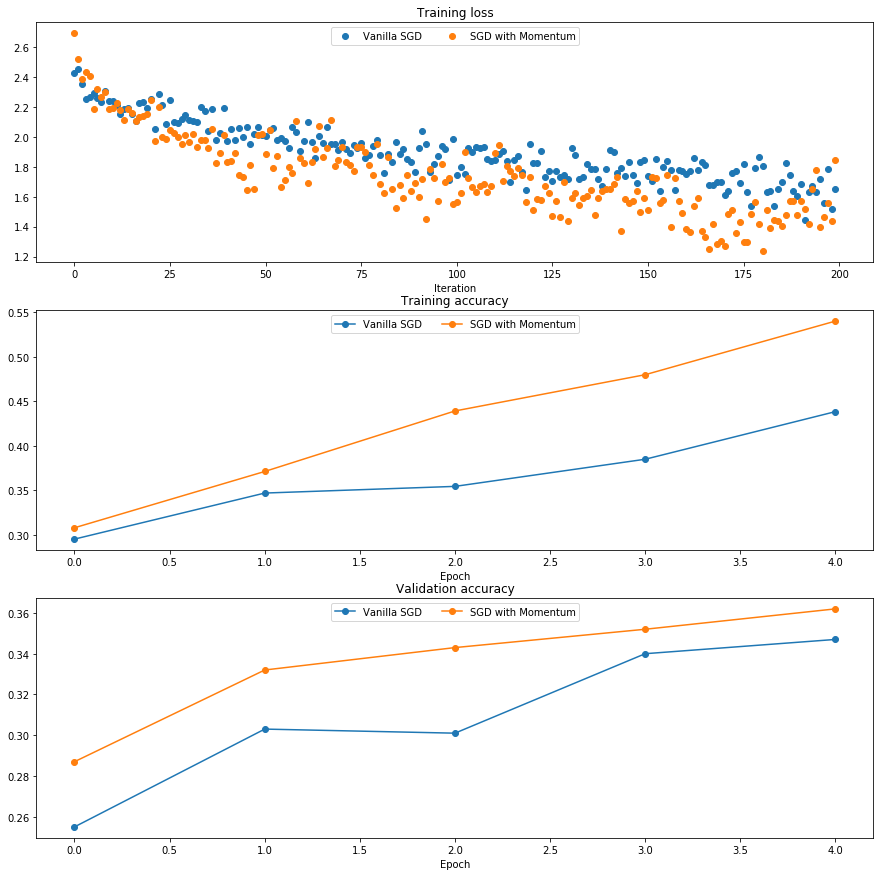

In [22]:
# Arrange a small data
num_train = 4000
small_data_dict = {
    "data_train": (data["data_train"][:num_train], data["labels_train"][:num_train]),
    "data_val": (data["data_val"], data["labels_val"]),
    "data_test": (data["data_test"], data["labels_test"])
}

model_sgd      = FullyConnectedNetwork()
model_sgdm     = FullyConnectedNetwork()
loss_f_sgd     = cross_entropy()
loss_f_sgdm    = cross_entropy()
optimizer_sgd  = SGD(model_sgd.net, 1e-2)
optimizer_sgdm = SGDM(model_sgdm.net, 1e-2, 0.9)

print ("Training with Vanilla SGD...")
results_sgd = train_net(small_data_dict, model_sgd, loss_f_sgd, optimizer_sgd, batch_size=100, 
                        max_epochs=5, show_every=100, verbose=True)

print ("\nTraining with SGD plus Momentum...")
results_sgdm = train_net(small_data_dict, model_sgdm, loss_f_sgdm, optimizer_sgdm, batch_size=100, 
                         max_epochs=5, show_every=100, verbose=True)

opt_params_sgd,  loss_hist_sgd,  train_acc_hist_sgd,  val_acc_hist_sgd  = results_sgd
opt_params_sgdm, loss_hist_sgdm, train_acc_hist_sgdm, val_acc_hist_sgdm = results_sgdm

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgd, 'o', label="Vanilla SGD")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgd, '-o', label="Vanilla SGD")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgd, '-o', label="Vanilla SGD")
         
plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgdm, 'o', label="SGD with Momentum")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgdm, '-o', label="SGD with Momentum")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgdm, '-o', label="SGD with Momentum")
  
for i in [1, 2, 3]:
    plt.subplot(3, 1, i)
    plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

## RMSProp
RMSProp:  
\begin{equation}
\gamma: decay\ rate \\
\epsilon: small\ number \\
g_t^2: squared\ gradients \\
\eta: learning\ rate \\
E[g^2]_t: decaying\ average\ of\ past\ squared\ gradients\ at\ update\ step\ t \\
E[g^2]_t = \gamma E[g^2]_{t-1} + (1-\gamma)g_t^2 \\
\theta_{t+1} = \theta_t - \frac{\eta \nabla_{\theta}J(\theta)}{\sqrt{E[g^2]_t+\epsilon}}
\end{equation}

In [23]:
%reload_ext autoreload

# Test RMSProp implementation; you should see errors less than 1e-7
N, D = 4, 5
test_rms = sequential(fc(N, D, name="rms_fc"))

w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
cache = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

test_rms.layers[0].params = {"rms_fc_w": w}
test_rms.layers[0].grads = {"rms_fc_w": dw}

opt_rms = RMSProp(test_rms, 1e-2, 0.99)
opt_rms.cache = {"rms_fc_w": cache}
opt_rms.step()

updated_w = test_rms.layers[0].params["rms_fc_w"]
cache = opt_rms.cache["rms_fc_w"]

expected_updated_w = np.asarray([
  [-0.39223849, -0.34037513, -0.28849239, -0.23659121, -0.18467247],
  [-0.132737,   -0.08078555, -0.02881884,  0.02316247,  0.07515774],
  [ 0.12716641,  0.17918792,  0.23122175,  0.28326742,  0.33532447],
  [ 0.38739248,  0.43947102,  0.49155973,  0.54365823,  0.59576619]])
expected_cache = np.asarray([
  [ 0.5976,      0.6126277,   0.6277108,   0.64284931,  0.65804321],
  [ 0.67329252,  0.68859723,  0.70395734,  0.71937285,  0.73484377],
  [ 0.75037008,  0.7659518,   0.78158892,  0.79728144,  0.81302936],
  [ 0.82883269,  0.84469141,  0.86060554,  0.87657507,  0.8926    ]])

print ('The following errors should be around or less than 1e-7')
print ('updated_w error: ', rel_error(expected_updated_w, updated_w))
print ('cache error: ', rel_error(expected_cache, opt_rms.cache["rms_fc_w"]))

The following errors should be around or less than 1e-7
updated_w error:  9.50264522989e-08
cache error:  2.64779558072e-09


## Adam
Adam Optimizer:  
\begin{equation}
t = t + 1 \\
g_t: gradients\ at\ update\ step\ t \\
m_t = \beta_1m_{t-1} + (1-\beta_1)g_t \\
v_t = \beta_2v_{t-1} + (1-\beta_2)g_t^2 \\
\hat{m_t} = m_t / (1 - \beta_1^t) \\
\hat{v_t} = v_t / (1 - \beta_2^t) \\
\theta_{t+1} = \theta_t - \frac{\eta\ \hat{m_t}}{\sqrt{\hat{v_t}}+\epsilon} \\
\end{equation}

In [24]:
%reload_ext autoreload

# Test Adam implementation; you should see errors around 1e-7 or less
N, D = 4, 5
test_adam = sequential(fc(N, D, name="adam_fc"))

w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
m = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)
v = np.linspace(0.7, 0.5, num=N*D).reshape(N, D)

test_adam.layers[0].params = {"adam_fc_w": w}
test_adam.layers[0].grads = {"adam_fc_w": dw}

opt_adam = Adam(test_adam, 1e-2, 0.9, 0.999, t=5)
opt_adam.mt = {"adam_fc_w": m}
opt_adam.vt = {"adam_fc_w": v}
opt_adam.step()

updated_w = test_adam.layers[0].params["adam_fc_w"]
mt = opt_adam.mt["adam_fc_w"]
vt = opt_adam.vt["adam_fc_w"]

expected_updated_w = np.asarray([
  [-0.40094747, -0.34836187, -0.29577703, -0.24319299, -0.19060977],
  [-0.1380274,  -0.08544591, -0.03286534,  0.01971428,  0.0722929],
  [ 0.1248705,   0.17744702,  0.23002243,  0.28259667,  0.33516969],
  [ 0.38774145,  0.44031188,  0.49288093,  0.54544852,  0.59801459]])
expected_v = np.asarray([
  [ 0.69966,     0.68908382,  0.67851319,  0.66794809,  0.65738853,],
  [ 0.64683452,  0.63628604,  0.6257431,   0.61520571,  0.60467385,],
  [ 0.59414753,  0.58362676,  0.57311152,  0.56260183,  0.55209767,],
  [ 0.54159906,  0.53110598,  0.52061845,  0.51013645,  0.49966,   ]])
expected_m = np.asarray([
  [ 0.48,        0.49947368,  0.51894737,  0.53842105,  0.55789474],
  [ 0.57736842,  0.59684211,  0.61631579,  0.63578947,  0.65526316],
  [ 0.67473684,  0.69421053,  0.71368421,  0.73315789,  0.75263158],
  [ 0.77210526,  0.79157895,  0.81105263,  0.83052632,  0.85      ]])

print ('The following errors should be around or less than 1e-7')
print ('updated_w error: ', rel_error(expected_updated_w, updated_w))
print ('mt error: ', rel_error(expected_m, mt))
print ('vt error: ', rel_error(expected_v, vt))

The following errors should be around or less than 1e-7
updated_w error:  1.13956917985e-07
mt error:  4.21496319311e-09
vt error:  4.20831403811e-09


## Comparing the optimizers

Training with RMSProp...
(Iteration 1 / 200) loss: 2.698909998671575
(Epoch 1 / 5) Training Accuracy: 0.35175, Validation Accuracy: 0.312
(Epoch 2 / 5) Training Accuracy: 0.4015, Validation Accuracy: 0.337
(Iteration 101 / 200) loss: 1.5897378132744475
(Epoch 3 / 5) Training Accuracy: 0.49925, Validation Accuracy: 0.354
(Epoch 4 / 5) Training Accuracy: 0.54025, Validation Accuracy: 0.375
(Epoch 5 / 5) Training Accuracy: 0.615, Validation Accuracy: 0.395

Training with Adam...
(Iteration 1 / 200) loss: 2.5588211380778505
(Epoch 1 / 5) Training Accuracy: 0.36625, Validation Accuracy: 0.313
(Epoch 2 / 5) Training Accuracy: 0.43975, Validation Accuracy: 0.352
(Iteration 101 / 200) loss: 1.629462404812041
(Epoch 3 / 5) Training Accuracy: 0.516, Validation Accuracy: 0.365
(Epoch 4 / 5) Training Accuracy: 0.57825, Validation Accuracy: 0.369
(Epoch 5 / 5) Training Accuracy: 0.613, Validation Accuracy: 0.365


/anaconda3/envs/yulenv/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


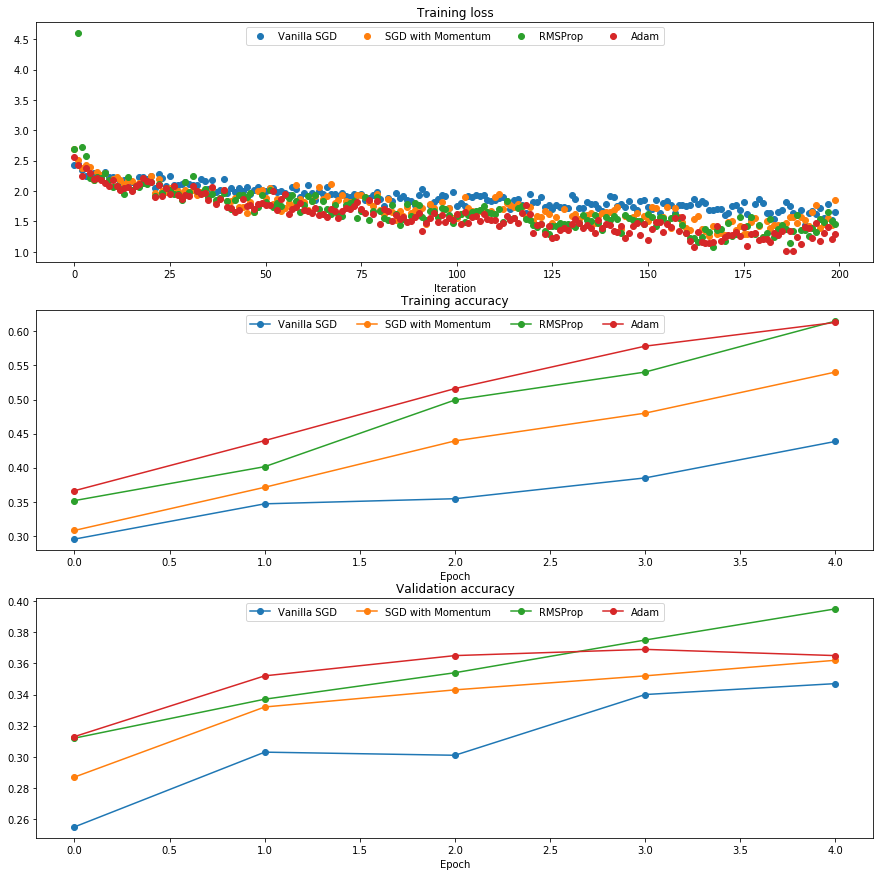

In [25]:
model_rms      = FullyConnectedNetwork()
model_adam     = FullyConnectedNetwork()
loss_f_rms     = cross_entropy()
loss_f_adam    = cross_entropy()
optimizer_rms  = RMSProp(model_rms.net, 5e-4)
optimizer_adam = Adam(model_adam.net, 5e-4)

print ("Training with RMSProp...")
results_rms = train_net(small_data_dict, model_rms, loss_f_rms, optimizer_rms, batch_size=100, 
                        max_epochs=5, show_every=100, verbose=True)

print ("\nTraining with Adam...")
results_adam = train_net(small_data_dict, model_adam, loss_f_adam, optimizer_adam, batch_size=100, 
                         max_epochs=5, show_every=100, verbose=True)

opt_params_rms,  loss_hist_rms,  train_acc_hist_rms,  val_acc_hist_rms  = results_rms
opt_params_adam, loss_hist_adam, train_acc_hist_adam, val_acc_hist_adam = results_adam

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgd, 'o', label="Vanilla SGD")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgd, '-o', label="Vanilla SGD")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgd, '-o', label="Vanilla SGD")
         
plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgdm, 'o', label="SGD with Momentum")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgdm, '-o', label="SGD with Momentum")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgdm, '-o', label="SGD with Momentum")

plt.subplot(3, 1, 1)
plt.plot(loss_hist_rms, 'o', label="RMSProp")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_rms, '-o', label="RMSProp")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_rms, '-o', label="RMSProp")
         
plt.subplot(3, 1, 1)
plt.plot(loss_hist_adam, 'o', label="Adam")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_adam, '-o', label="Adam")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_adam, '-o', label="Adam")
  
for i in [1, 2, 3]:
    plt.subplot(3, 1, i)
    plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

## Training a Network with Dropout

In [26]:
# Train two identical nets, one with dropout and one without
num_train = 200
data_dict_500 = {
    "data_train": (data["data_train"][:num_train], data["labels_train"][:num_train]),
    "data_val": (data["data_val"], data["labels_val"]),
    "data_test": (data["data_test"], data["labels_test"])
}

solvers = {}
keep_ps = [0, 0.25, 0.50, 0.75]

results_dict = {}
for keep_prob in keep_ps:
    results_dict[keep_prob] = {}

for keep_prob in keep_ps:
    print ("Dropout Keep Prob =", keep_prob)
    model = DropoutNetTest(keep_prob=keep_prob)
    loss_f = cross_entropy()
    optimizer = SGD(model.net, 1e-4)
    results = train_net(data_dict_500, model, loss_f, optimizer, batch_size=100, 
                        max_epochs=25, show_every=100, verbose=True)
    opt_params, loss_hist, train_acc_hist, val_acc_hist = results
    results_dict[keep_prob] = {
        "opt_params": opt_params, 
        "loss_hist": loss_hist, 
        "train_acc_hist": train_acc_hist, 
        "val_acc_hist": val_acc_hist
    }

Dropout Keep Prob = 0
(Iteration 1 / 50) loss: 2.572609795295732
(Epoch 1 / 25) Training Accuracy: 0.1, Validation Accuracy: 0.088
(Epoch 2 / 25) Training Accuracy: 0.11, Validation Accuracy: 0.089
(Epoch 3 / 25) Training Accuracy: 0.11, Validation Accuracy: 0.087
(Epoch 4 / 25) Training Accuracy: 0.12, Validation Accuracy: 0.092
(Epoch 5 / 25) Training Accuracy: 0.135, Validation Accuracy: 0.102
(Epoch 6 / 25) Training Accuracy: 0.155, Validation Accuracy: 0.098
(Epoch 7 / 25) Training Accuracy: 0.155, Validation Accuracy: 0.102
(Epoch 8 / 25) Training Accuracy: 0.17, Validation Accuracy: 0.105
(Epoch 9 / 25) Training Accuracy: 0.175, Validation Accuracy: 0.105
(Epoch 10 / 25) Training Accuracy: 0.19, Validation Accuracy: 0.101
(Epoch 11 / 25) Training Accuracy: 0.195, Validation Accuracy: 0.105
(Epoch 12 / 25) Training Accuracy: 0.205, Validation Accuracy: 0.102
(Epoch 13 / 25) Training Accuracy: 0.205, Validation Accuracy: 0.105
(Epoch 14 / 25) Training Accuracy: 0.205, Validation A

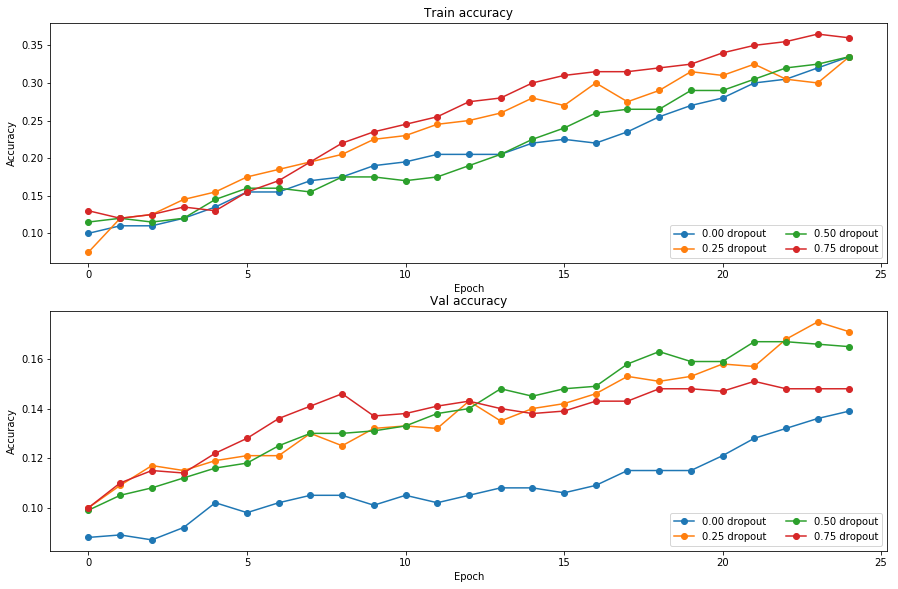

In [27]:
# Plot train and validation accuracies of the two models
train_accs = []
val_accs = []
for keep_prob in keep_ps:
    curr_dict = results_dict[keep_prob]
    train_accs.append(curr_dict["train_acc_hist"][-1])
    val_accs.append(curr_dict["val_acc_hist"][-1])

plt.subplot(3, 1, 1)
for keep_prob in keep_ps:
    curr_dict = results_dict[keep_prob]
    plt.plot(curr_dict["train_acc_hist"], '-o', label='%.2f dropout' % keep_prob)
plt.title('Train accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')
  
plt.subplot(3, 1, 2)
for keep_prob in keep_ps:
    curr_dict = results_dict[keep_prob]
    plt.plot(curr_dict["val_acc_hist"], '-o', label='%.2f dropout' % keep_prob)
plt.title('Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')

plt.gcf().set_size_inches(15, 15)
plt.show()

#### We can observe that Adam and RMSProp optimizers gives better train accuracy and less train loss than Vanilla SGD and SGD with momentum.  Hence, it is better to optimize training with Adam or RMSProp. However, the validation accuracy is not the same as the train procedure, we have to be careful to choose which optimizing method to use for the validation accuracy.  In case of dropout, we oberve that there is a benefit to do dropout in this case. However, the dropout effect can be differ during different epoch in validation procedure. Here, we could observe that any dropout is effective more than 0.00 dropout in the validation procedure.

## Plot the Activation Functions

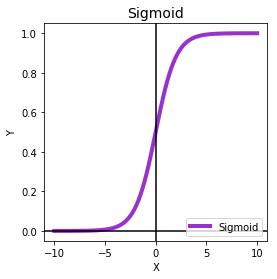

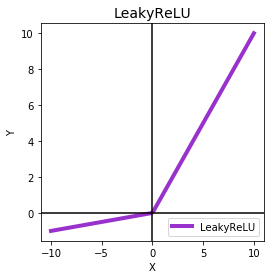

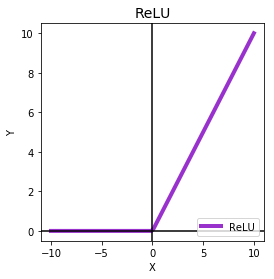

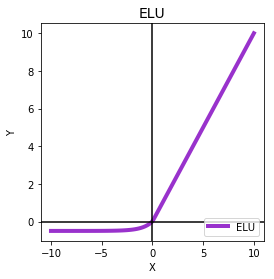

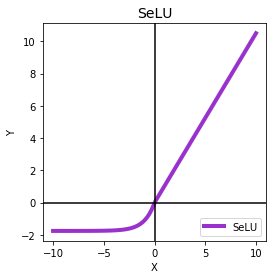

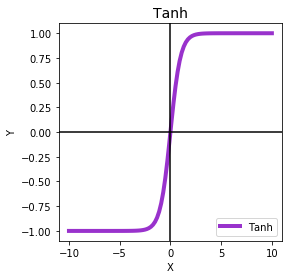

In [5]:
left, right = -10, 10
X  = np.linspace(left, right, 100)
XS = np.linspace(-5, 5, 10)
lw = 4
alpha = 0.1 # alpha for leaky_relu
elu_alpha = 0.5
selu_alpha = 1.6732
selu_scale = 1.0507

#########################
####### YOUR CODE #######
#########################
sigmoid = lambda x: 1/(1 + np.exp(-x))
leaky_relu = lambda x: np.where(x>0, x, x*alpha)
relu = lambda x: np.maximum(x,0)
elu = lambda x: np.where(x>0, x, elu_alpha * (np.exp(x) - 1))
selu = lambda x: np.where(x>0, selu_scale*x, selu_scale*selu_alpha*(np.exp(x)-1))
tanh = lambda x: np.tanh(x)
#########################
### END OF YOUR CODE ####
#########################

activations = {
    "Sigmoid": sigmoid,
    "LeakyReLU": leaky_relu,
    "ReLU": relu,
    "ELU": elu,
    "SeLU": selu,
    "Tanh": tanh
}

# Ground Truth activations
GT_Act = {
    "Sigmoid": [0.00669285092428, 0.0200575365379, 0.0585369028744, 0.158869104881, 0.364576440742, 
                0.635423559258, 0.841130895119, 0.941463097126, 0.979942463462, 0.993307149076],
    "LeakyReLU": [-0.5, -0.388888888889, -0.277777777778, -0.166666666667, -0.0555555555556, 
                  0.555555555556, 1.66666666667, 2.77777777778, 3.88888888889, 5.0],
    "ReLU": [-0.0, -0.0, -0.0, -0.0, -0.0, 0.555555555556, 1.66666666667, 2.77777777778, 3.88888888889, 5.0],
    "ELU": [-0.4966310265, -0.489765962143, -0.468911737989, -0.405562198581, -0.213123289631, 
            0.555555555556, 1.66666666667, 2.77777777778, 3.88888888889, 5.0],
    "SeLU": [-1.74618571868, -1.72204772347, -1.64872296837, -1.42598202974, -0.749354802287, 
             0.583722222222, 1.75116666667, 2.91861111111, 4.08605555556, 5.2535],
    "Tanh": [-0.999909204263, -0.999162466631, -0.992297935288, -0.931109608668, -0.504672397722, 
             0.504672397722, 0.931109608668, 0.992297935288, 0.999162466631, 0.999909204263]
} 

for label in activations:
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(X, activations[label](X), color='darkorchid', lw=lw, label=label)
    assert rel_error(activations[label](XS), GT_Act[label]) < 1e-9, \
           "Your implementation of {} might be wrong".format(label)
    ax.legend(loc="lower right")
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title('{}'.format(label), fontsize=14)
    plt.xlabel(r"X")
    plt.ylabel(r"Y")
    plt.show()